**PRÁCTICA 4. CCNs CON KERAS PARA LA CLASIFICACIÓN DE IMÁGENES**

Despues de trabajar durante las dos prácticas anteriores con la librería de bajo nivel denominada TensorFlow, en la presente práctica se va a introducir un framework de alto nivel para el entrenamiento de redes neuronales denominado **Keras**. Esta librería fue desarrollada por **François Chollet** en 2015 con el objetivo de **simplificar la programación de algoritmos basados en aprendizaje profundo** ofreciendo un conjunto de abstracciones más intuitivas y de alto nivel. Keras hace uso de librerías de más bajo nivel o ***backend*** por detrás, concretamente se puede escoger entre **TensorFlow,  Microsoft Cognitive Toolkit o Theano**. Debido a la buena acogida de Keras por parte de la comunidad científica, **TensorFlow** decide embeber dicho paquete en su **versión 2.0** (con la que trabajaremos en esta práctica) cuya release data de octubre de 2019.



---



**EJERCICIO 1.** El conjunto de datos **[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)** se compone de **60000 imágenes RGB** de dimensiones **32x32** pertenecientes a **10 clases distintas** (6000 imágenes por clase). CIFAR10 se separa en dos subconjuntos de datos: **50000** imágenes para **entrenamiento** y las **10000** restantes se emplean como set de **test**. Lo primero que debemos hacer es importar el set de datos empleando el módulo datasets de Keras, **normalizar las imágenes** para mapearlas al **rango [0,1]** y si lo creemos necesario convertir las etiquetas a ***one-hot enconding***.


In [1]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
print(trainX.shape)
print(trainY.shape)
# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)

[INFO] loading CIFAR-10 data...
(50000, 32, 32, 3)
(50000, 1)
(50000, 10)


Ahora que tenemos en memoria el set de datos CIFAR10, lo primero que debemos hacer es **mostrar unas cuantas imágenes** para visualizar la **variabilidad** existente:

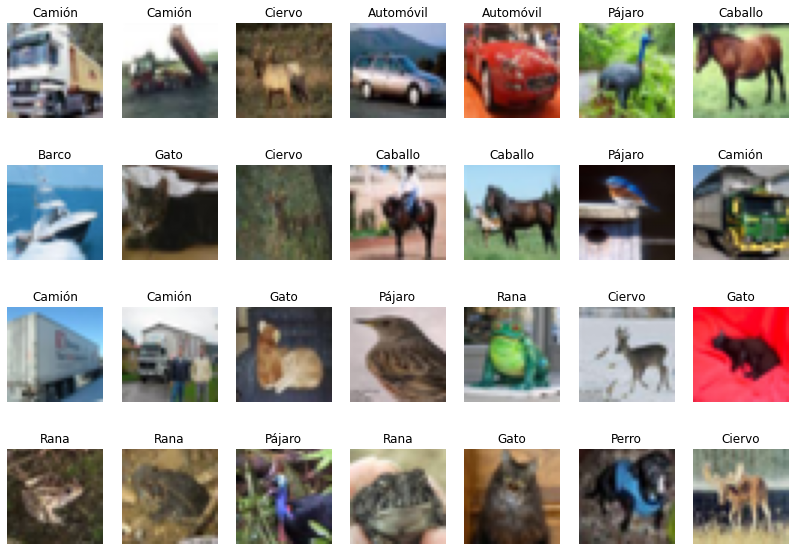

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.title(labelNames[trainY[n].argmax(axis=0)]) #Si tenemos trainY one-hot encoded
    plt.axis('off')

1. Entrena una red perceptron multicapa con dos capas ocultas (la primera de ellas de **1024** neuronas y la segunda de **512**). Emplea como función de activación **ReLU** y **SGD** como optimizador con una tasa de aprendizaje **```lr = 0.01```**. Como función de pérdidas utilizaremos ***categorical crossentropy***. Entrenad la red con valores de **```epochs = 50```** y **```batch_size = 32```**.

  **Nota.** Prestad atención a como se cargan los datos, en caso de que se carguen  etiquetas en decimal se deberá emplear el método **```sparse_categorical_crossentropy```** o en su caso utilizar el objeto **LabelBinarizer** de la librería **ScikitLearn** para convertir las etiquetas a one hot encoding (i.e. etiquetas binarias) y poder emplear como función objetivo **```categorical_crossentropy```**. Busca en la documentación las diferencias entre ambos métodos y explicalas. Además el tipo de datos de nuestras etiquetas también hay que tenerlo en cuenta cuando hagamos uso del método **```classification_report```** para obtener las métricas de evaluación de nuestro modelo.

2. En caso de que la red no alcance una buena precisión prueba a dotarla de más profundidad. Concretamente incluye cinco capas ocultas con **2048, 1024, 512, 128 y 32** neuronas, respectivamente. Comenta los resultados comparando ambas arquitecturas de red. En caso de que se evidencien signos de overfitting realiza una **segunda ejecución de esta arquitectura** incluyendo una capa de **dropout** tras cada *hidden layer* (probar con un par de valores ```p_drop```). ¿Que sucede?



In [5]:
n_epochs = 50
batch_size = 32

[INFO]: Entrenando red neuronal...
Epoch 1/50
1250/1250 [==============================] - 10s 5ms/step - loss: 1.8666 - accuracy: 0.3309 - val_loss: 1.7480 - val_accuracy: 0.3867
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6778 - accuracy: 0.4072 - val_loss: 1.6637 - val_accuracy: 0.4127
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5968 - accuracy: 0.4347 - val_loss: 1.6041 - val_accuracy: 0.4390
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5391 - accuracy: 0.4544 - val_loss: 1.5645 - val_accuracy: 0.4446
Epoch 5/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4929 - accuracy: 0.4740 - val_loss: 1.5781 - val_accuracy: 0.4402
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4514 - accuracy: 0.4873 - val_loss: 1.5188 - val_accuracy: 0.4705
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4165 - accuracy: 0.500

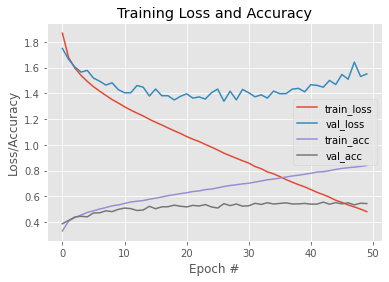

In [6]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential() # Instancia de modelo API secuencial #(X)
model.add(Flatten(input_shape=(32,32,3))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
model.add(Dense(1024,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Compilamos el modelo sacando el accuracy y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(optimizer=SGD(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
H = model.fit(trainX,trainY,validation_split = 0.2,epochs=n_epochs, batch_size=batch_size)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(x=testX, batch_size=None)
# Obtenemos el report (requiere etiquetas y predicciones categóricas)
print(classification_report(np.argmax(testY, axis=1),np.argmax(predictions, axis=1)))

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


[INFO]: Entrenando red neuronal...
Epoch 1/50
1250/1250 [==============================] - 9s 6ms/step - loss: 1.9148 - accuracy: 0.3070 - val_loss: 1.7987 - val_accuracy: 0.3427
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6907 - accuracy: 0.3953 - val_loss: 1.7159 - val_accuracy: 0.3920
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5967 - accuracy: 0.4301 - val_loss: 1.6078 - val_accuracy: 0.4315
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5339 - accuracy: 0.4534 - val_loss: 1.5616 - val_accuracy: 0.4496
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4755 - accuracy: 0.4715 - val_loss: 1.5158 - val_accuracy: 0.4572
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4273 - accuracy: 0.4914 - val_loss: 1.4759 - val_accuracy: 0.4730
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3902 - accuracy: 0.5031

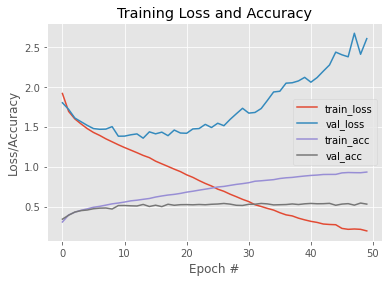

In [7]:
model = Sequential() # Instancia de modelo API secuencial #(X)
model.add(Flatten(input_shape=(32,32,3))) #Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
model.add(Dense(2048,activation = 'relu'))
model.add(Dense(1024,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Compilamos el modelo sacando el accuracy y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(optimizer=SGD(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
H = model.fit(trainX,trainY,validation_split = 0.2,epochs=n_epochs, batch_size=batch_size)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(x=testX, batch_size=None)
# Obtenemos el report (requiere etiquetas y predicciones categóricas)
print(classification_report(np.argmax(testY, axis=1),np.argmax(predictions, axis=1)))

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()



---



Tal y como hemos visto en la sesión teórica, en la mayoría de problemas de clasificación de imagen, no es suficiente con crear un modelo de predicción basado en un perceptrón multicapa. Para problemas de cierta dificultad, este tipo de arquitectura no ofrece una solución precisa. Por este motivo se propusieron las **redes neuronales convolucionales**. Dichas arquitecturas de red **extraen la información relevante automáticamente** de la imagen por medio de la operación convolución de manera local (en la práctica dicha operación es la correlación cruzada). 

**EJERCICIO 2.** En el siguiente ejercicio vamos a desarrollar **nuestra primera red neuronal convolucional** y entrenarla sobre el **conjunto de datos CIFAR10**. Para ello, vamos a definir en el método ```shallow_CNN(width, heigh, depth, classes)```una arquitectura de red formada por **un único bloque convolucional** compuesto por una capa convolucional (**Conv2D** en Keras) de **32 filtros 3x3** empleando **```padding="same"```** y  la función de activación **ReLu**. Posteriormente, **estiraremos el volumen** resultante y lo llevaremos a una **capa de salida** compuesta por **10 neuronas**. Como se ha detallado en la sesión teórica, Keras tiene dos métodos distintos para implementar la arquitectura de red: el secuencial y el funcional. Implementa esta primera red convolucional utilizando el **método secuencial**. De nuevo emplea **SGD** como optimizador con una tasa de aprendizaje **```lr = 0.01```**. Como función de pérdidas utilizaremos ***categorical crossentropy*** (para etiquetas binarias o decimales según el caso). Entrenad la red con valores de **```epochs = 50```** y **```batch_size = 32```**. ¿Se produce una mejora sustancial con respecto a la arquitectura perceptrón multicapa? ¿Que crees que necesita nuestra CNN? 

**Nota.** Emplead el padding necesario para que las dimensiones del mapa de activación tras la capa convolucional se mantengan intactas.

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8661 - accuracy: 0.3411 - val_loss: 1.7323 - val_accuracy: 0.4000
Epoch 2/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1.6273 - accuracy: 0.4337 - val_loss: 1.5782 - val_accuracy: 0.4558
Epoch 3/50
1172/1172 [==============================] - 6s 5ms/step - loss: 1.4726 - accuracy: 0.4869 - val_loss: 1.4341 - val_accuracy: 0.5102
Epoch 4/50
1172/1172 [==============================] - 5s 5ms/step - loss: 1.3626 - accuracy: 0.5248 - val_loss: 1.3720 - val_accuracy: 0.5257
Epoch 5/50
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2933 - accuracy: 0.5457 - val_loss: 1.3306 - val_accuracy: 0.5353
Epoch 6/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.2459 - accuracy: 0.5627 - val_loss: 1.3082 - val_accuracy: 0.5416
Epoch 7/50
1172/1172 [==============================] - 6s 5ms/step - loss:

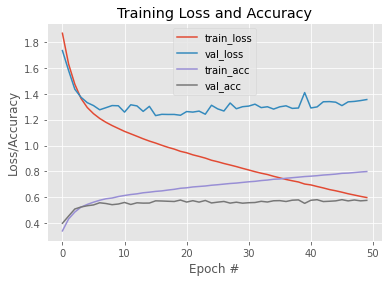

In [4]:
# import the necessary packages
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

def shallow_CNN(width, height, depth, classes):
  # Definimos el modo API Sequential y las dimensiones de la entrada (suponemos TF->"channels last")
  model = Sequential()
  # Definir la arquitectura
  # Capa convolucional
  model.add(Conv2D(32, (3,3), padding='same',activation = 'relu', input_shape = (width, height, depth)))
  # Clasificación
  # Estiramos el volumen de activación a un vector
  model.add(Flatten())
  # Añadimos capa de salida
  model.add(Dense(10, activation="softmax"))
  # La función debe devolver el modelo como salida
  return model


# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = shallow_CNN(32,32,3,10)
# Compilamos el modelo sacando el accuracy
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(trainX, trainY, epochs=50,validation_split = 0.25, batch_size=32)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(testX,batch_size = 32)
# Sacamos el report para test
print(classification_report(np.argmax(testY,axis = 1), np.argmax(predictions,axis = 1)))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

De los resultados extraidos del apartado anterior se puede observar que para separar los datos de CIFAR10 en las distintas clases que lo componen requerimos de un **mayor número de bloques convolucionales**. Cuando esto sucede es necesario **introducir capas de pooling** entre bloques convolucionales sucesivos con el objetivo de reducir las dimensiones espaciales de un bloque al siguiente a la vez que aumenta el número de mapas de activación.

**EJERCICIO 3.** A continuación vamos a construir una **arquitectura** más avanzada **compuesta por dos bloques convolucionales (*base model*) y un bloque destinado a la clasificación (*top model*)** tal y como se muestra en la imagen siguiente:

![CNN_CIFAR10](https://drive.google.com/uc?id=1F6upnZDAp6su41bSegUJmRZgwXlsnqmY)


Codifica la arquitectura de la figura anterior en una función definida como:

   >>>```deep_CNN(width, height, depth, classes, batchNorm)```

El parámetro de entrada **```batchNorm```** debe ser una **bandera** a partir de la cual se aplique la técnica de **Batch Normalization** en los lugares indicados en la arquitectura en el caso que ```batchNorm=True```. En caso contrario no se aplicará dicha técnica. En este ejercicio **SE DEBE** emplear la **API funcional de Keras** para crear la arquitectura. Cabe destacar que en esta ocasión al tratarse de una red con mayor profundidad vamos a aplicar la técnica de **learning rate decay** y **nesterov acceleration** con valores **```decay=lr/epochs```** y **```momentum=0.9```**, respectivamente.  

- Ejecutad el entrenamiento con valores de **```epochs = 50```** y **```batch_size = 64```**. ¿Que se pueden decir ahora sobre los resultados de clasificación?¿Existe alguna diferencia entre la ejecución con ```batchNorm=True``` y ```batchNorm=False```?  

**Nota 1.** Emplear el padding necesario para que las dimensiones del mapa de activación tras cualquier capa convolucional se mantengan intactas.

**Nota 2.** La fase de **entrenamiento** en este ejercicio ya empieza a consumir un **tiempo considerable** de la sesión. Es por ello, que con tal de evitar que tengaís que volver a realizar el entrenamiento en caso de cierre insesperado del navegador o cualquier otro error **GUARDAD el modelo** una vez entrenado en un directorio de vuestro Google Drive (i.e. **/My Drive/Curso_CFP_DL/P4/Models**). Para montar Google Drive en vuestro código en Colab leed las trasparencias de la sesión teórica. Para almacenar el modelo entrenado emplead la fúncion de Keras **```mymodel.save(path)```** (no sin antes leer la documentación de la misma)


[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
625/625 [==============================] - 10s 12ms/step - loss: 1.6976 - accuracy: 0.4390 - val_loss: 1.2811 - val_accuracy: 0.5389
Epoch 2/50
625/625 [==============================] - 7s 12ms/step - loss: 1.2329 - accuracy: 0.5756 - val_loss: 1.1225 - val_accuracy: 0.6102
Epoch 3/50
625/625 [==============================] - 7s 12ms/step - loss: 1.0383 - accuracy: 0.6424 - val_loss: 0.9201 - val_accuracy: 0.6720
Epoch 4/50
625/625 [==============================] - 7s 12ms/step - loss: 0.9183 - accuracy: 0.6816 - val_loss: 0.8391 - val_accuracy: 0.7051
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.8376 - accuracy: 0.7064 - val_loss: 0.7918 - val_accuracy: 0.7255
Epoch 6/50
625/625 [==============================] - 7s 12ms/step - loss: 0.7755 - accuracy: 0.7290 - val_loss: 0.7692 - val_accuracy: 0.7316
Epoch 7/50
625/625 [==============================] - 8s 12ms/step - loss: 0.724

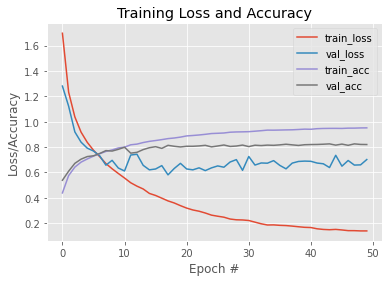

In [13]:
# import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

def deep_CNN(width, height, depth, classes, batchNorm):
  
  # Definimos entradas en modo "channels last"
  model = Sequential()
    
  # Definimos la arquitectura
  # Primer set de capas CONV => RELU => CONV => RELU => POOL
  model.add(Conv2D(32,(3,3),padding = 'same', input_shape = (width, height, depth)))
  model.add(Activation('relu'))
  if batchNorm: 
    model.add(BatchNormalization())

  model.add(Conv2D(32,(3,3),padding = 'same'))
  model.add(Activation('relu') )

  if batchNorm:
    model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))
  
  # Segundo set de capas CONV => RELU => CONV => RELU => POOL
  model.add(Conv2D(64,(3,3),padding = 'same'))
  model.add(Activation('relu'))

  if batchNorm:
    model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), padding = 'same'))
  model.add(Activation('relu'))

  if batchNorm:
    model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))
  
  # Primer (y único) set de capas FC => RELU
  model.add(Flatten())
  model.add(Dense(512,activation = 'relu'))
  if batchNorm:
    model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # Clasificador softmax
  model.add(Dense(10,activation = 'softmax'))
  # Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
  #???
  
  # La función debe devolver el modelo como salida           
  return model

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = deep_CNN(32,32,3,10,True)
# Compilamos el modelo sacando como mérica el accuracy
model.compile(optimizer = SGD(lr=0.01, weight_decay=0.01/50, momentum=0.9, nesterov=True),loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(trainX,trainY,validation_split=0.2,epochs = 50, batch_size = 64)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
from google.colab import drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save('/content/drive/My Drive/Curso Deep Learning UPV/Sesion 4/modelo_cnn.h5')

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX,batch_size = 64)
# Sacamos el report para test
print(classification_report(np.argmax(testY,axis = 1), np.argmax(predictions,axis = 1)))



# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**EJERCICIO 4.** Por útlimo, vamos a **desarrollar un método** que a partir de un modelo de predicción ya entrenado y **una imagen de test**, muestre la misma por pantalla incluyendo **la clase a la que pertenece** y el **nivel de confianza** que ofrece el modelo en dicha predicción en el título de la figura. Para ello, comprobad si existe la variable que contenía el modelo anterior (```if 'model' not in locals():```) y en caso negativo cargad el modelo anteriormente almacenado en Drive empleando el comando de Keras **load_model(path)**. La cabecera de la función será la siguiente:

>>>>>> ```def predict_image(image, model, gt_str):```

Cabe destacar que el tercer parámetro de entrada **```gt_str```** es una **cadena de texto** que valdrá CIFAR10 en caso que estemos prediciendo imágenes de dicho set de datos (por defecto) y el String con el *ground-truth* en caso de que estemos prediciendo imágenes externas (siguiente ejercicio).
**Ejecutad** dicho método entre **10-15 veces** variando la imagen a testear de las del **conjunto de test de CIFAR10**. ¿Que puedes decir sobre el éxito en la predicción del modelo generado? 

In [17]:
if 'model' not in locals():
  print('No cargado')
else:
  print('El modelo está cargado en la variable model')

El modelo está cargado en la variable model


[INFO]: Clasificando imagen...
1/1 [==============================] - 0s 21ms/step
[[6.5109758e-05 1.4556887e-06 8.3242503e-07 2.7808102e-03 4.3661437e-08
  9.9540401e-01 1.6616129e-03 2.1690374e-05 5.9528702e-09 6.4382824e-05]]


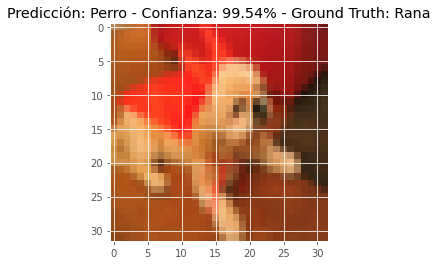

In [27]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
from google.colab import drive
from tensorflow.keras.models import load_model

def predict_image(image, model, gt_str="CIFAR10"):
  # Creamos una copia en la variable output sobre la que mostraremos el resultado (comando image.copy())
  output = image.copy()
  # Expandimos las dimensiones de la variable image de (32, 32, 3) a (1, 32, 32, 3) con np.expand_dims
  image = np.expand_dims(image,axis = 0)

  # Clasificación de la imagen empleando el modelo
  print("[INFO]: Clasificando imagen...")
  # Realizamos la predicción y la almacenamos en la variable proba
  proba = model.predict(image)
  print(proba)
  # Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
  idx = np.argmax(proba[0])
  label = labelNames[idx]
  gt = labelNames[np.argmax(testY[idx])]
  # En caso que en la variable gt_str no me pasen el string "CIFAR10" es que me estan pasando el string con la etiqueta
  # Si ese es el caso almaceno el gt de ese String (esto nos valdrá para predecir imágenes que no sean del dataset CIFAR10)
  if gt_str != "CIFAR10":
    gt = gt_str

  # Mostrando imagen e información
  label = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label, proba[0][idx] * 100, gt)
  plt.imshow(output)
  plt.title(label)
  plt.show()

# Escogemos una imagen de test al azar tal y como se hizo al principio de la práctica anterior
# para mostrar numeros de MNIST aleatoriamente (consultala si es necesario)
rand_index = np.random.randint(0, high=len(testX))
image = testX[rand_index]
if 'my_model' not in locals():
  # Montamos la unidad de Drive
  drive.mount('/content/drive')
  # Cargamos el modelo empleando la función load_model
  my_model = load_model('/content/drive/My Drive/Curso Deep Learning UPV/Sesion 4/modelo_cnn.h5')
# Predecimos la imagen (llamando a predict_image) pasando como parámetros la imagen, el modelo y la cadena de texto correspondiente
predict_image(image, model, gt_str="CIFAR10")

A continuación, cread un directorio en vuestro Google Drive (i.e. **/My Drive/Curso_CFP_DL/P4/Imagenes**) y almacenad diferentes imágenes obtenidas bien de Internet o de vuestras colecciones de imágenes personales (unas 10 imágenes). Empleando OPENCV leed una imagen del directorio y efectuar la predicción empleando el método anterior. Ahora el ground truth no lo teneís directamente disponible por lo que deberéis modificar la función para pasarle un String que contenga la etiqueta solución.

Predecid las 10 imágenes almacenadas en vuestro Google Drive, ¿Que puedes decir sobre el **éxito en la predicción del modelo** generado sobre **imágenes NO pertenecientes** al dataset **CIFAR10**?¿A que cree que puede ser debido este fenómeno?¿Que soluciones deberiamos adoptar para mejorar la precisión en la clasificación?

In [ ]:
from google.colab import drive

# Montamos la unidad de Drive
drive.mount('/content/drive')

# Selecciono imagen y la leo con OPENCV
img_path = '/content/drive/My Drive/Curso Deep Learning UPV/Sesion 4/imagenes/perro-ladrando.r_d.390-230-15469.jpeg' # Path de Drive donde tengo la imagen (incluido el nombre de la misma) #(X)
img_test = cv2.imread(img_path, cv2.IMREAD_COLOR) # Leo imagen con OPENCV
img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB) # Por defecto la carga en BGR, la convierto a RGB

# Muestro información de la imagen y hago la predicción sacando resultados
print(img_test.shape)
plt.imshow(img_test)
plt.title('my picture')
plt.show()

# Pre-procesamos tal y como hicimos para la fase de entrenamiento con las muestras de CIFAR10 (normalizándola de 0.0 a 1.0)
img_test = img_test.astype("float32") / 255.0
# Re-escalamos la imagen al tamaño con el que fue entrenada la red (comando cv2.resize)
img_test = cv2.resize(img_test, (32, 32))
# Predecimos la imagen pasando como parámetros a la función predict_image: la imagen, el modelo y string con el GT
predict_image(img_test, my_model, gt_str="perro")